In [1]:
!pip install kagglehub --upgrade

In [2]:
import kagglehub

In [3]:
# download the dataset from kaggle

kagglehub.dataset_download("undefinenull/million-song-dataset-spotify-lastfm")

100%|██████████| 639M/639M [00:09<00:00, 69.4MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1'

In [4]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_path = Path("/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1")


songs_data_path = data_path / 'Music Info.csv'
users_data_path = data_path / 'User Listening History.csv'

# Songs Dataset

In [6]:
# load the songs data

df_songs = pd.read_csv(songs_data_path)
df_songs.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


## Preliminary Analysis

In [7]:
# size of dataset

df_songs.shape

(50683, 21)

In [8]:
# data info

df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [9]:
# drop columns from data

columns_to_drop = ["spotify_preview_url"]

df_songs.drop(columns=columns_to_drop,inplace=True)

df_songs.head()

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,0.892,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,0.664,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


### Missing Values

In [10]:
# missing values

df_songs.isna().sum()

,0
track_id,0
name,0
artist,0
spotify_id,0
tags,1127
genre,28335
year,0
duration_ms,0
danceability,0
energy,0


In [11]:
import missingno as msno

<Axes: >

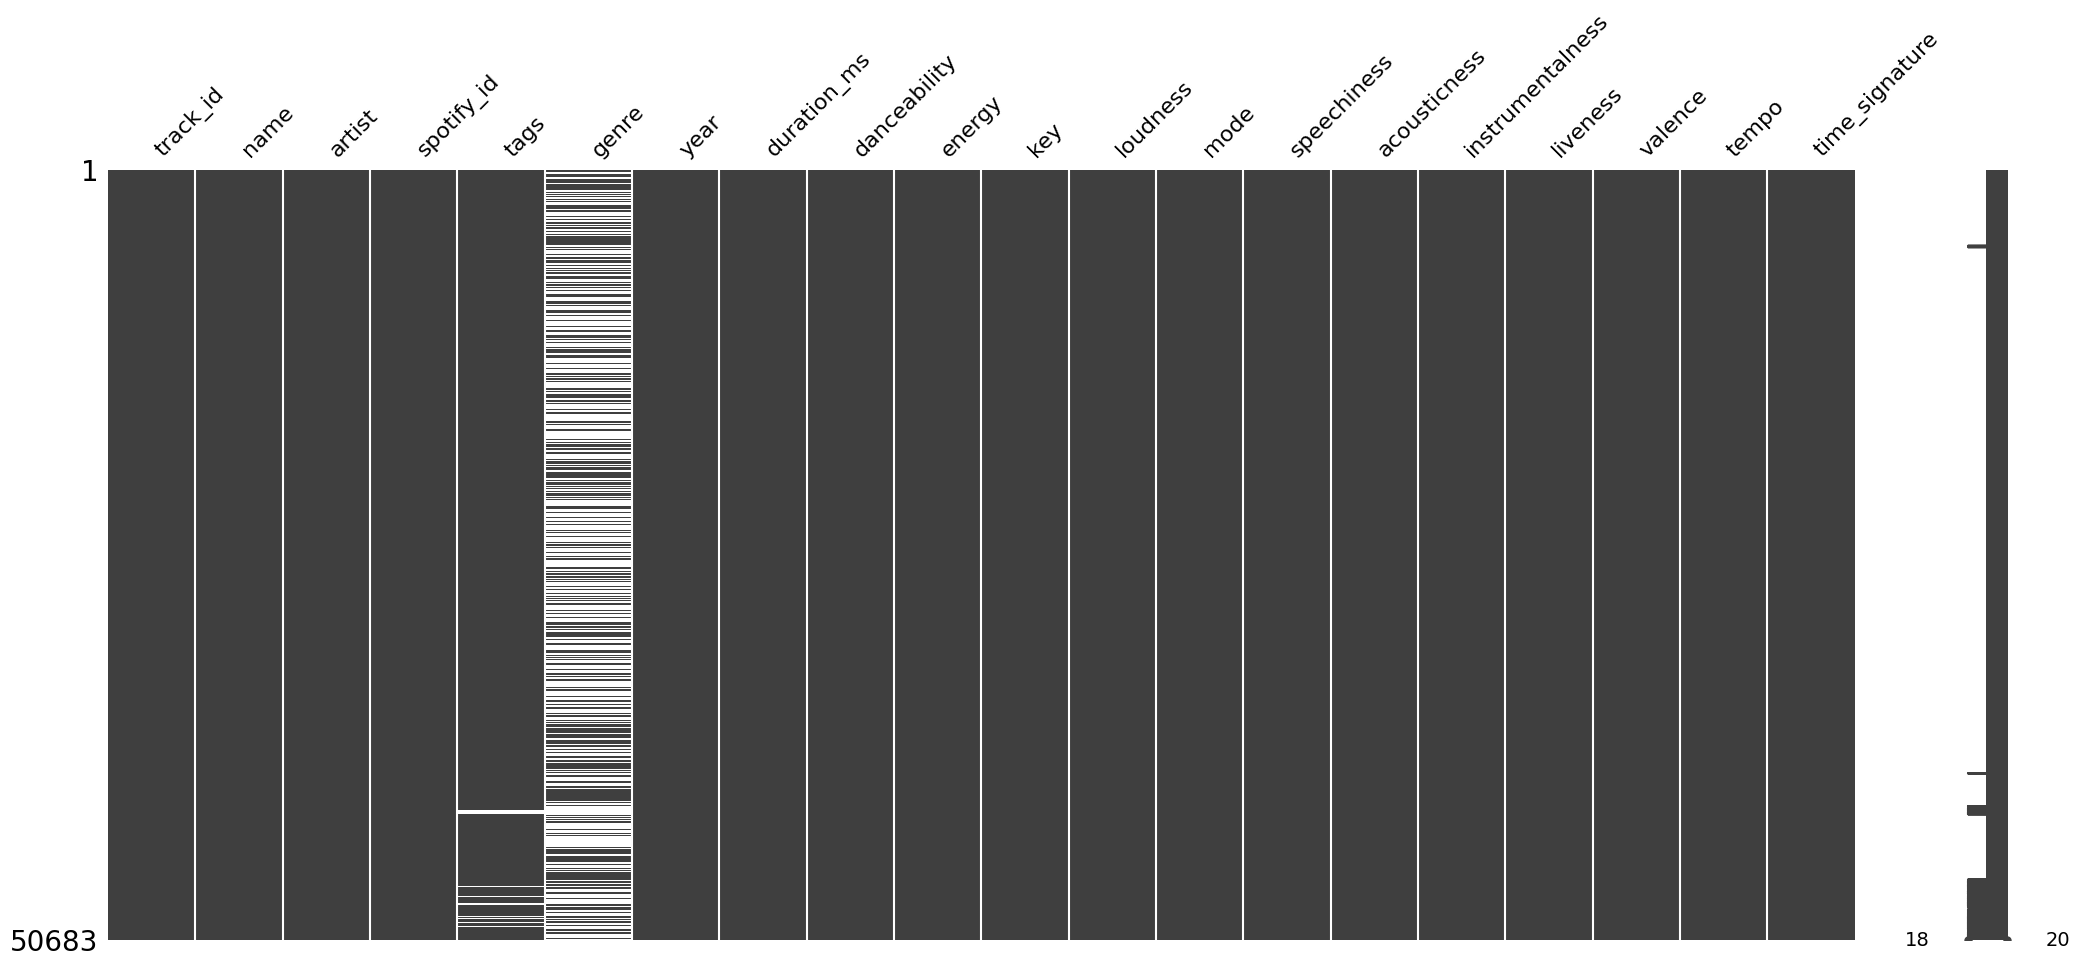

In [12]:
msno.matrix(df_songs)

In [13]:
# ratio of missing values in data

(
    df_songs
    .isna()
    .mean()
    .sort_values(ascending=False)
    .head(2)
    .mul(100)
)

,0
genre,55.906320
tags,2.223625


### Duplicates in Data

In [14]:
# check for duplicates based on name of the song

(
    df_songs
    .assign(name=df_songs['name'].str.lower())
    .duplicated(subset='name')
    .sum()
)

np.int64(815)

**There are 815 duplicate rows based on the name of the song**

In [15]:
# rows that are duplicate

(
    df_songs
    .loc[
        df_songs
        .assign(name=df_songs['name'].str.lower())
        .duplicated(subset='name',keep=False)
    ]
    .assign(name=df_songs['name'].str.lower())
    .sort_values("name")
)

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
34480,TRKKZMK128F4257579,3 am,Liv Kristine,1TgsnkiolcBhQssCR37JXx,"female_vocalists, power_metal, gothic_metal, g...",NaN,2005,302880,0.516,0.840,0,-6.038,0,0.0390,0.152000,0.005970,0.107,0.441,78.009,4
6588,TRGGALK12903CB68E5,3 am,Matchbox Twenty,5vYA1mW9g2Coh1HUFUSmlb,"rock, alternative, pop, alternative_rock, 90s,...",NaN,1996,225946,0.521,0.673,8,-8.685,1,0.0284,0.005730,0.000000,0.120,0.543,108.031,4
29795,TRLOXMF128F934BF04,3am,Matchbox Twenty,5vYA1mW9g2Coh1HUFUSmlb,"rock, alternative, 90s, piano, american, pop_rock",NaN,1996,225946,0.521,0.673,8,-8.685,1,0.0284,0.005730,0.000000,0.120,0.543,108.031,4
43800,TRPWOAS128E0781045,3am,Halsey,1OfLNb6dQ9dra1B58iT9Ex,pop_rock,NaN,2020,234858,0.385,0.871,0,-4.604,0,0.0795,0.009060,0.000000,0.579,0.538,189.760,4
15088,TRJRBRX128F4255789,4th of july,Soundgarden,237oH9rNUYpIBeHfAn3WJ0,"hard_rock, 90s, grunge",NaN,1994,308866,0.368,0.749,5,-5.523,0,0.0392,0.109000,0.000372,0.175,0.193,141.901,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34772,TRJFGYO128F4259743,you're the one that i want,Lo-Fang,1dEHQktvcM8vCCyI1x7yVB,"indie, male_vocalists, cover",NaN,2014,204706,0.445,0.309,11,-12.517,0,0.0404,0.643000,0.000369,0.224,0.153,119.754,4
32677,TRFZYLL128F146902A,you've really got a hold on me,Smokey Robinson and The Miracles,03AkIZeRvGpTvDF9vNJtdj,"soul, 60s, oldies",Rock,2012,179513,0.674,0.515,0,-6.895,1,0.0296,0.724000,0.000000,0.339,0.596,116.678,3
20976,TRUXHGS128F145E41A,you've really got a hold on me,The Miracles,01FtGX94CSvO5Zxs5B6AMM,"soul, 60s, oldies",NaN,1994,180266,0.679,0.406,0,-10.533,1,0.0312,0.755000,0.000000,0.412,0.511,117.940,3
27680,TRXWPMW12903CB42A0,zombies,Childish Gambino,73kAUSAht4YOR7xNPmNb2L,funk,NaN,2016,281813,0.653,0.411,0,-11.986,1,0.1270,0.503000,0.000969,0.067,0.468,160.055,4


In [16]:
# duplicates in the data based on spotify_id

(
    df_songs
    .duplicated(subset="spotify_id")
    .sum()
)

np.int64(9)

In [17]:
# duplicate songs in the data

(
    df_songs
    .duplicated(subset=["spotify_id","year","duration_ms"])
    .sum()
)

np.int64(9)

**9 Duplicate songs in the data**

In [18]:
# rows that have duplicate data

(
    df_songs
    .loc[
        df_songs
        .duplicated(subset=["spotify_id","year","duration_ms"],keep=False)
    ]
    .sort_values(["spotify_id","year","duration_ms"])
)

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
15326,TRJNHPN128F92EF139,Adagio For Strings,Samuel Barber,00otCiz9kUb3Vg7LPKNCZG,"instrumental, classical, soundtrack, beautiful",NaN,2014,431412,0.140,0.0947,10,-18.599,0,0.0458,0.97800,0.478000,0.0735,0.0365,84.560,4
21570,TRLSRQD128F426CFF8,"Adagio for Strings, Op. 11",Samuel Barber,00otCiz9kUb3Vg7LPKNCZG,classical,NaN,2014,431412,0.140,0.0947,10,-18.599,0,0.0458,0.97800,0.478000,0.0735,0.0365,84.560,4
14861,TRLOZQZ128F92E8A3F,How Do You Want It,2Pac,02VsIBmSkhc7uHNyPViZR3,"rap, hip_hop",NaN,2011,289000,0.832,0.7850,8,-2.859,1,0.0930,0.11100,0.000007,0.0623,0.8120,92.468,4
14981,TRXHJQY128F42B5094,How Do U Want It,2Pac,02VsIBmSkhc7uHNyPViZR3,"rap, hip_hop, american",Rap,2011,289000,0.832,0.7850,8,-2.859,1,0.0930,0.11100,0.000007,0.0623,0.8120,92.468,4
37040,TRGCZFO128F92EE221,Je pense à toi,Amadou & Mariam,09jsAIZF9ThihIzdrw4KAS,"alternative, beautiful, french",NaN,2005,316880,0.680,0.3990,11,-11.585,0,0.0279,0.74900,0.001610,0.1580,0.8280,106.349,4
49162,TRZBNQU128F148C04F,Je Pense A Toi,Amadou & Mariam,09jsAIZF9ThihIzdrw4KAS,NaN,NaN,2005,316880,0.680,0.3990,11,-11.585,0,0.0279,0.74900,0.001610,0.1580,0.8280,106.349,4
13427,TRJQFIT128E0781CED,Too Much Too Young,The Specials,0ndKJL8gA4zLl317M7vndn,"punk, 80s, new_wave, reggae, ska",NaN,2012,116160,0.597,0.8390,2,-9.052,1,0.0471,0.44700,0.000134,0.3100,0.9650,156.058,4
46512,TRDTUTO128F422F138,Too Much Too Young (Live),The Specials,0ndKJL8gA4zLl317M7vndn,ska,NaN,2012,116160,0.597,0.8390,2,-9.052,1,0.0471,0.44700,0.000134,0.3100,0.9650,156.058,4
1684,TRRZUGN128F42A1EEE,There There,Radiohead,0thdzbW0cRKCx12VbBRB6T,"rock, electronic, alternative, indie, alternat...",Rock,2008,323600,0.614,0.6770,9,-8.317,0,0.0323,0.01930,0.518000,0.1080,0.7170,126.477,4
2983,TRXFHCL128F92E0989,"There, There",Radiohead,0thdzbW0cRKCx12VbBRB6T,"rock, electronic, alternative, indie, alternat...",NaN,2008,323600,0.614,0.6770,9,-8.317,0,0.0323,0.01930,0.518000,0.1080,0.7170,126.477,4


In [19]:
# drop duplicates

df_songs.drop_duplicates(subset=["spotify_id","year","duration_ms"],inplace=True)

In [20]:
# check for duplicates

(
    df_songs
    .duplicated(subset=["spotify_id","year","duration_ms"])
    .sum()
)

np.int64(0)

**Duplicate songs have been removed from the data**

## Column Wise Analysis

### Categorical Columns

In [21]:
# list of columns in data

df_songs.columns

Index(['track_id', 'name', 'artist', 'spotify_id', 'tags', 'genre', 'year',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [22]:
df_songs.dtypes

,0
track_id,object
name,object
artist,object
spotify_id,object
tags,object
genre,object
year,int64
duration_ms,int64
danceability,float64
energy,float64


In [23]:
# shape of data

df_songs.shape

(50674, 20)

In [24]:
# Categorical Columns

categorical_features = df_songs.select_dtypes(include="object").columns
categorical_features

Index(['track_id', 'name', 'artist', 'spotify_id', 'tags', 'genre'], dtype='object')

In [25]:
def categorical_analysis(df,feature_names,k_artists=15):
    for feature in feature_names:
        print(f"Number of categories in column {feature} are ",df[feature].str.lower().nunique())

        if feature in ["artist","genre"]:
            print(df[feature].value_counts().head(k_artists))

        if feature == "genre":
            print(f"The unique categories in {feature} column are: ", df[feature].dropna().unique())
        print("#" * 75)

In [26]:
# perform catagorical analysis

categorical_analysis(df_songs,categorical_features)

Number of categories in column track_id are  50674
###########################################################################
Number of categories in column name are  49860
###########################################################################
Number of categories in column artist are  8317
artist
The Rolling Stones    132
Radiohead             110
Autechre              105
Tom Waits             100
Bob Dylan              98
The Cure               94
Metallica              85
Johnny Cash            84
Nine Inch Nails        83
Sonic Youth            81
Iron Maiden            76
In Flames              76
Elliott Smith          76
Mogwai                 75
Boards of Canada       75
Name: count, dtype: int64
###########################################################################
Number of categories in column spotify_id are  50674
###########################################################################
Number of categories in column tags are  20054
###########################

**Observations**:  
1. The `Track ID` and `Spotify ID`'s are unique for every row.
2. The song names have some repititions. That is because there are a few songs in the data whose name is the same but is sung by a different artist.
3. The dataset contains songs of about `8317 artists`.
4. There are 15 distinct categories in the `Genre` column.

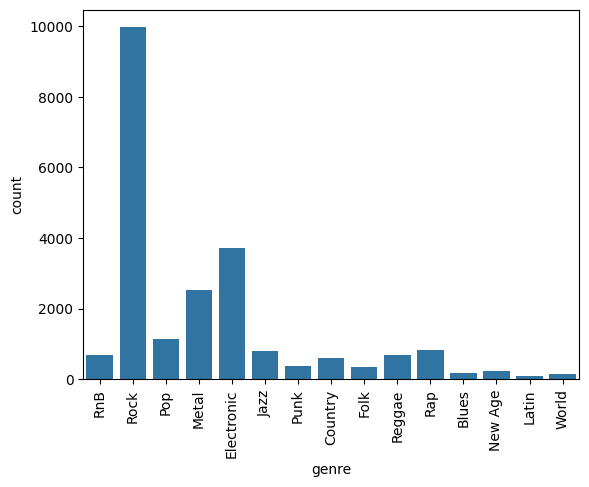

In [27]:
# countplot of genre

sns.countplot(df_songs,x="genre")
plt.xticks(rotation=90)
plt.show()

In [28]:
# genre group

genre_group = df_songs.groupby("genre")

genre_group[['genre','tags']].sample(3)

,genre,tags
42272,Blues,"female_vocalists, blues"
9720,Blues,"jazz, singer_songwriter, blues"
499,Blues,"rock, classic_rock, hard_rock, heavy_metal, br..."
33562,Country,country
33324,Country,"female_vocalists, country"
18431,Country,"rock, classic_rock, progressive_rock, pop_rock"
39212,Electronic,"downtempo, idm"
17045,Electronic,"electronic, dance, 90s, techno"
3335,Electronic,"electronic, dance, house, electro"
46927,Folk,folk


In [29]:
# song titles in the data that are not in english

(   df_songs
    .loc[
        df_songs
        .loc[:,"name"]
        .str.contains("[^\d\w\s.?!':;-_(){},\.#-&/-]")
    ]
)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1189661129.py:7: SyntaxWarning: invalid escape sequence '\d'
  .str.contains("[^\d\w\s.?!':;-_(){},\.#-&/-]")


,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2455,TRBGIZH128F4252D9E,2 + 2 = 5,Radiohead,0dUSgj5UiJHY92RCuEFYcx,"rock, electronic, alternative, indie, alternat...",Rock,2008,199360,0.443,0.717,5,-5.498,0,0.0504,0.182000,0.000051,0.3450,0.3860,149.582,4
4463,TRGHMRU128F1478067,"I Put The ""Metro"" In Metronome",Cute Is What We Aim For,718VxOgHaLU7oGS9686hg6,"alternative, emo",Rock,2006,206053,0.538,0.858,11,-3.862,1,0.0638,0.085200,0.000000,0.2580,0.7060,149.971,4
6870,TRGIILN12903CE46BB,1+1,Beyoncé,0b4bcwV5QWTzgza5u1gh5C,"female_vocalists, soul, rnb, beautiful",NaN,2011,273880,0.303,0.384,6,-7.342,1,0.0339,0.381000,0.000005,0.0661,0.2610,63.345,5
7902,TRZMLSV128F9305C8C,B********,Rammstein,2fKyVXrtvFkqv5lVPf1UXa,"metal, industrial, german",Rock,2009,254013,0.352,0.905,9,-3.792,1,0.0836,0.000895,0.218000,0.1810,0.3270,141.016,3
7974,TRFRAEO128F4279C87,F**k the System,System of a Down,0uvPnGOwcaUNT6gwJF98wL,"metal, nu_metal",Metal,2002,132733,0.474,0.994,8,-1.884,1,0.1030,0.002160,0.126000,0.3140,0.8470,171.433,4
10722,TRODWHD128F92FD8BA,4 + 20,"Crosby, Stills, Nash & Young",2jZPEeW2ynykb2GkVqpOkJ,"rock, classic_rock, folk, singer_songwriter, a...",Rock,1970,126640,0.638,0.058,4,-25.243,1,0.0388,0.928000,0.079000,0.1130,0.1260,140.964,4
13127,TRLMIXB128EF3435DD,M+M's,blink-182,0z6VQdAqi0HjQYULMUYpBt,"punk, punk_rock",NaN,2005,155680,0.212,0.921,9,-6.092,1,0.0567,0.000054,0.003990,0.0669,0.6800,159.629,4
14454,TRKEIVB128F930A597,"Nuthin' But a ""G"" Thang",Dr. Dre,1qaZx6y94LiMy2KdhHxRTy,"rap, 90s, hip_hop",NaN,2005,230026,0.817,0.704,7,-8.336,1,0.2850,0.009390,0.000000,0.0850,0.6800,94.627,4
17862,TRBZLOG12903CB78FD,I Belong To You [+Mon Coeur S'Ouvre A Ta Voix],Muse,114rzL6VEy9bb3amPcY3tw,"rock, alternative_rock, progressive_rock, soun...",Rock,2009,338813,0.481,0.603,2,-6.590,1,0.0280,0.166000,0.032100,0.1090,0.2130,105.974,4
22541,TRYVOPZ128F4254176,£4,These New Puritans,1LsQ5WkLU8ubiAz6AtMNll,"electronic, alternative, british, industrial, ...",Rock,2008,133173,0.692,0.759,11,-9.216,1,0.0533,0.052200,0.012900,0.4630,0.2560,99.988,4


In [30]:
# artists in the data that are not in english

(   df_songs
    .loc[
        df_songs
        .loc[:,"artist"]
        .str.contains("[^\d\w\s.?!':;-_\(\)\{\},\.#-+&\/\-\"]")
    ]
)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2814537950.py:7: SyntaxWarning: invalid escape sequence '\d'
  .str.contains("[^\d\w\s.?!':;-_\(\)\{\},\.#-+&\/\-\"]")


,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
25657,TRUOKRP128F9306B97,DAYBREAK'S BELL,L'Arc~en~Ciel,0f6N93Iqa1jIGY87ckKe8h,"japanese, j_pop",NaN,2007,251653,0.442,0.939,7,-4.032,1,0.0432,0.001010,0.000282,0.3040,0.780,156.138,4
25688,TRYYZGB128F9306B92,MY HEART DRAWS A DREAM,L'Arc~en~Ciel,0K1VcVuws8cBEOS8bb8Svo,"japanese, j_pop",NaN,2007,256826,0.449,0.812,2,-4.105,1,0.0332,0.000732,0.000000,0.1130,0.287,131.850,4
25696,TRYAFFS128F425E71A,Seventh Heaven,L'Arc~en~Ciel,0vc0kp9kYeqLCoDOKFYESL,"japanese, j_pop",NaN,2007,301373,0.488,0.963,9,-3.486,1,0.0532,0.000381,0.000000,0.7340,0.795,129.963,4
25704,TRZBUIY128F9306B9D,Hurry Xmas,L'Arc~en~Ciel,0NMWlIwjGldOgbABHTYx82,"japanese, j_pop",Rock,2007,289133,0.447,0.869,0,-3.362,1,0.0508,0.043600,0.000001,0.1350,0.562,116.043,4
25715,TRDLCHM128F427F235,Spirit dreams inside,L'Arc~en~Ciel,0hyTPlLk6MWOGiKFstN0S2,japanese,NaN,2002,224013,0.510,0.959,9,-4.793,1,0.0548,0.000194,0.002000,0.1950,0.693,118.017,4
25763,TRKTCEP128F9306B91,Pretty girl,L'Arc~en~Ciel,0QUESFm42vSLGffjwud4jl,"japanese, j_pop",Rock,2007,197866,0.373,0.954,0,-3.024,1,0.0777,0.001360,0.000000,0.0548,0.695,176.037,4
25788,TRMDISG128EF341CBC,Lover Boy,L'Arc~en~Ciel,69Gd7FRSCuB4X7D7gDOdhz,japanese,NaN,2004,285026,0.428,0.977,4,-4.600,0,0.0701,0.003850,0.001320,0.1630,0.504,152.023,4
25790,TRHNIIF128F42884A7,TRUST,L'Arc~en~Ciel,5ROfpAhDOiDkyn17SNDtAG,japanese,NaN,2005,269066,0.507,0.895,2,-5.892,1,0.0432,0.002160,0.002600,0.0745,0.393,95.965,4
25799,TRMZMPL128F1490F27,Niji,L'Arc~en~Ciel,1AhmwzPwhatp999J4Ky9nH,"japanese, j_pop",NaN,1998,305600,0.521,0.706,2,-6.931,1,0.0284,0.001310,0.000206,0.3610,0.534,93.020,4
25800,TRANWBU128F42717D4,My Dear,L'Arc~en~Ciel,12UBEdmkCBXtnbnQEvdHWp,japanese,NaN,2005,309826,0.464,0.804,8,-5.762,0,0.0320,0.198000,0.006470,0.1360,0.362,112.013,4


In [31]:
df_songs['tags'][0]

'rock, alternative, indie, alternative_rock, indie_rock, 00s'

In [32]:
all_tags = []

for tags in df_songs["tags"].dropna().str.replace(" ","").str.split(","):
    all_tags.extend(tags)

In [33]:
print("The number of unique tags are ",len(set(all_tags)))

The number of unique tags are  100


In [34]:
set(all_tags)

{'00s',
 '60s',
 '70s',
 '80s',
 '90s',
 'acoustic',
 'alternative',
 'alternative_rock',
 'ambient',
 'american',
 'avant_garde',
 'beautiful',
 'black_metal',
 'blues',
 'blues_rock',
 'british',
 'britpop',
 'chill',
 'chillout',
 'classic_rock',
 'classical',
 'country',
 'cover',
 'dance',
 'dark_ambient',
 'death_metal',
 'doom_metal',
 'downtempo',
 'drum_and_bass',
 'electro',
 'electronic',
 'emo',
 'experimental',
 'female_vocalists',
 'folk',
 'french',
 'funk',
 'german',
 'gothic',
 'gothic_metal',
 'grindcore',
 'grunge',
 'guitar',
 'hard_rock',
 'hardcore',
 'heavy_metal',
 'hip_hop',
 'house',
 'idm',
 'indie',
 'indie_pop',
 'indie_rock',
 'industrial',
 'instrumental',
 'j_pop',
 'japanese',
 'jazz',
 'lounge',
 'love',
 'male_vocalists',
 'mellow',
 'melodic_death_metal',
 'metal',
 'metalcore',
 'new_age',
 'new_wave',
 'noise',
 'nu_metal',
 'oldies',
 'piano',
 'polish',
 'pop',
 'pop_rock',
 'post_hardcore',
 'post_punk',
 'post_rock',
 'power_metal',
 'progress

In [35]:
# unique tags in the data

(
    df_songs
    .loc[:,"tags"]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
    .unique()
)

array(['rock', 'alternative', 'indie', 'alternative_rock', 'indie_rock',
       '00s', 'pop', 'british', '90s', 'love', 'britpop', 'grunge',
       'piano', 'beautiful', 'mellow', 'chillout', 'funk', 'electronic',
       'dance', 'hip_hop', 'trip_hop', 'metal', 'hard_rock', 'nu_metal',
       'progressive_rock', 'classic_rock', '80s', '70s', 'experimental',
       'soundtrack', 'female_vocalists', 'heavy_metal', 'rap', '60s',
       'post_punk', 'pop_rock', 'punk', 'punk_rock', 'acoustic', 'emo',
       'new_wave', 'chill', 'indie_pop', 'gothic_metal', 'gothic',
       'thrash_metal', 'folk', 'singer_songwriter', 'country', 'cover',
       'blues_rock', 'psychedelic', 'psychedelic_rock', 'guitar',
       'american', 'ska', 'ambient', 'blues', 'oldies', 'french',
       'male_vocalists', 'reggae', 'instrumental', 'jazz', 'avant_garde',
       'industrial', 'german', 'synthpop', 'hardcore', 'metalcore',
       'screamo', 'post_rock', 'swedish', 'doom_metal', 'power_metal',
       'rnb', 

### Integer Based Columns

**Key**  

**What it means:** The musical key in which the song is composed, represented as integers (e.g., 0 = C, 1 = C#, 2 = D, etc., up to 11).  
- **When value is small:** Represents keys like C or D, often associated with simplicity or familiarity.  
- **When value is large:** Represents keys like A# or B, which may sound brighter or more complex, depending on the context.  

---

**Mode**  

**What it means:** Refers to the modality of the song, where 0 = minor (often associated with sadness or tension) and 1 = major (associated with happiness or resolution).  
- **When value is small:** Indicates the song is in a minor mode, creating a more somber or serious tone.  
- **When value is large:** Indicates the song is in a major mode, giving it a cheerful and uplifting feel.  

---

**Time Signature**  

**What it means:** The number of beats in each bar of music, typically expressed as an integer (e.g., 4 for 4/4 time).  
- **When value is small:** Indicates fewer beats per measure (e.g., 3), which can create a waltz-like or less conventional rhythm.  
- **When value is large:** Indicates more beats per measure (e.g., 5 or 7), often leading to a more complex or experimental rhythmic structure.


> A value of **4** in the time signature typically means the song is in **4/4 time**, also known as "common time." This means there are **4 beats per measure**, and the quarter note gets one beat.

>**Impact of a 4 Time Signature:**  
- **Musical Feel:** It creates a steady, balanced, and natural rhythm that is easy to follow.  
- **Prevalence:** It is the most common time signature in Western music, used in many genres like pop, rock, classical, and jazz.  
- **Examples:** Songs like "Billie Jean" by Michael Jackson or "Shape of You" by Ed Sheeran are in 4/4.

In [36]:
integer_columns = df_songs.select_dtypes(include="int").columns
integer_columns

Index(['year', 'duration_ms', 'key', 'mode', 'time_signature'], dtype='object')

In [37]:
df_songs[integer_columns]

,year,duration_ms,key,mode,time_signature
0,2004,222200,1,1,4
1,2006,258613,2,1,4
2,1991,218920,4,0,4
3,2004,237026,9,1,4
4,2008,238640,7,1,4
...,...,...,...,...,...
50678,2008,273440,6,0,4
50679,2004,275133,0,1,4
50680,2014,254826,10,0,4
50681,2008,243293,4,0,4


In [38]:
# statistical summary

(
    df_songs
    .loc[:,integer_columns]
    .drop(columns=["duration_ms"])
    .assign(**{
        col: df_songs[col].astype("object")
        for col in integer_columns.drop("duration_ms")
    })
    .describe()
)

,year,key,mode,time_signature
count,50674,50674,50674,50674
unique,75,12,2,5
top,2007,9,1,4
freq,4221,5907,31979,44981


In [39]:
# range of data

(
    df_songs
    .loc[:,integer_columns]
    .assign(duration_minutes=df_songs["duration_ms"].div(1000).div(60))
    .drop(columns=["duration_ms"])
    .agg(["min","max"])
)

,year,key,mode,time_signature,duration_minutes
min,1900,0,0,0,0.023983
max,2022,11,1,5,63.606217


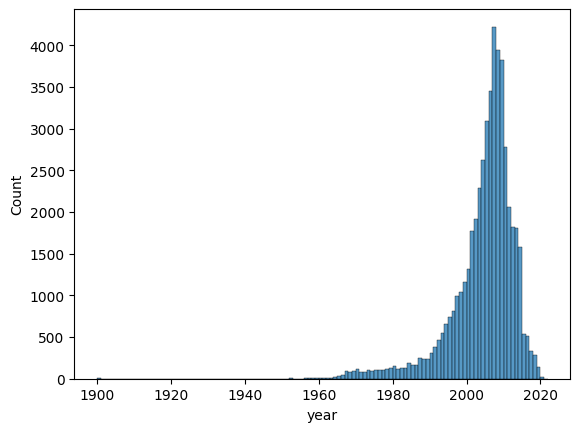

In [40]:
# number of songs per year in data

sns.histplot(df_songs,x="year",bins=df_songs["year"].max() - df_songs["year"].min(),stat="count")
plt.show()

In [41]:
# most songs from which year(top 5)

(
    df_songs
    .loc[:,"year"]
    .value_counts()
    .head(5)
    .sort_index()
)

,count
year,
2005,3085
2006,3453
2007,4221
2008,3947
2009,3827


-----

**Keys**

Musical notes are assigned key values from **0 to 11**, representing all the chromatic notes in an octave. Here’s the mapping:  

| **Key Value** | **Note** |  
|---------------|-----------|  
| 0             | C         |  
| 1             | C# / Db   |  
| 2             | D         |  
| 3             | D# / Eb   |  
| 4             | E         |  
| 5             | F         |  
| 6             | F# / Gb   |  
| 7             | G         |  
| 8             | G# / Ab   |  
| 9             | A         |  
| 10            | A# / Bb   |  
| 11            | B         |  

### Notes Explained:  
- **Sharps (#):** Raise the note by a semitone (e.g., C → C#).  
- **Flats (b):** Lower the note by a semitone (e.g., D → Db).  

This cycle repeats across octaves!

-----

**English vs Hindi Notes Comparison**

Here’s a table that maps **Key Value**, **English Notes**, and their corresponding **Hindi Music Notes (Swaras)**:  

| **Key Value** | **English Note** | **Hindi Music Note** |  
|---------------|------------------|-----------------------|  
| 0             | C                | Sa                   |  
| 1             | C# / Db          | Komal Re             |  
| 2             | D                | Re                   |  
| 3             | D# / Eb          | Komal Ga             |  
| 4             | E                | Ga                   |  
| 5             | F                | Ma                   |  
| 6             | F# / Gb          | Tivra Ma             |  
| 7             | G                | Pa                   |  
| 8             | G# / Ab          | Komal Dha            |  
| 9             | A                | Dha                  |  
| 10            | A# / Bb          | Komal Ni             |  
| 11            | B                | Ni                   |  

**Notes**:
- In **Hindi classical music**, "Komal" refers to flat (lowered) notes, and "Tivra" refers to sharp (raised) notes.
- The cycle repeats with "Sa" at the next octave!

-----

If a song has a key value of **2**, it means the song is composed in the **D major** or **D minor key**, depending on the **mode** (0 = minor, 1 = major).  

**Interpretation**:              
- **Key Value 2 (D):** The tonic note, or "home base," of the song is **D**. All other notes and chords in the song revolve around this note.
- **In Western Music:**  
  - **D Major:** Bright and uplifting.  
  - **D Minor:** Melancholic or introspective.
- **In Hindi Classical Music:** This corresponds to the "Re" swara (if D is treated as the Sa of the scale).

The overall mood or emotion of the song will depend on the mode and how the scale is used melodically and harmonically.

----------------
----------------

In [42]:
# unique values in the key column

(
    np.sort(df_songs
            .loc[:,"key"]
            .unique())
)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

<Axes: title={'center': 'Percentage of Songs wrt to Key'}, xlabel='Percentage', ylabel='key'>

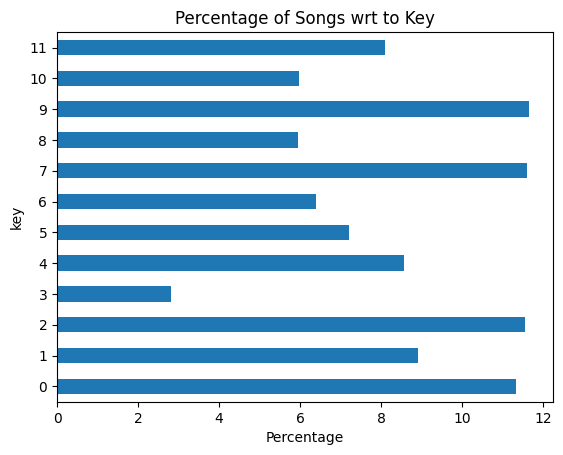

In [43]:
# percentage of songs wrt to key in the data

(
    df_songs['key']
    .value_counts(normalize=True)
    .mul(100)
    .sort_index()
    .plot(kind='barh',title="Percentage of Songs wrt to Key",xlabel="Percentage")
)

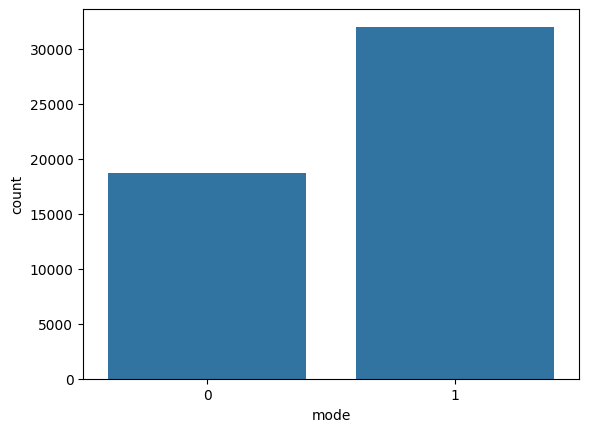

In [44]:
# countplot for mode

sns.countplot(df_songs,x="mode")
plt.show()

In [45]:
# unique values for time signature

(
    np.sort(df_songs
            .loc[:,"time_signature"]
            .unique())
)

array([0, 1, 3, 4, 5])

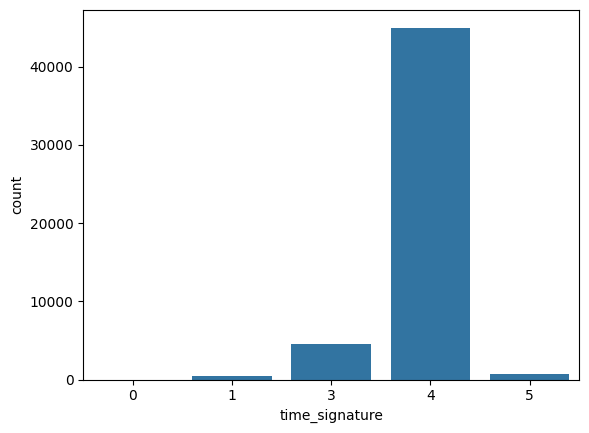

In [46]:
# countplot for time signature

sns.countplot(df_songs,x="time_signature")
plt.show()

In [47]:
(
    df_songs['time_signature']
    .value_counts(normalize=True)
    .mul(100)
)

,proportion
time_signature,
4,88.765442
3,8.880294
5,1.444528
1,0.890003
0,0.019734


In [48]:
# statistical summary of time duration

(
    df_songs
    .loc[:,["duration_ms"]]
    .assign(duration_minutes=df_songs["duration_ms"].div(1000).div(60))
    .drop(columns="duration_ms")
    .describe()
)

,duration_minutes
count,50674.000000
mean,4.185893
std,1.793154
min,0.023983
25%,3.212217
50%,3.915550
75%,4.803046
max,63.606217


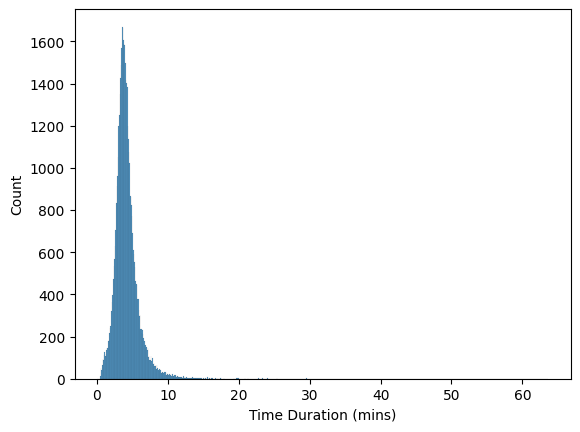

In [49]:
# time duration histogram

time_duration_mins = df_songs["duration_ms"].div(1000).div(60)

sns.histplot(time_duration_mins)
plt.xlabel("Time Duration (mins)")
plt.show()

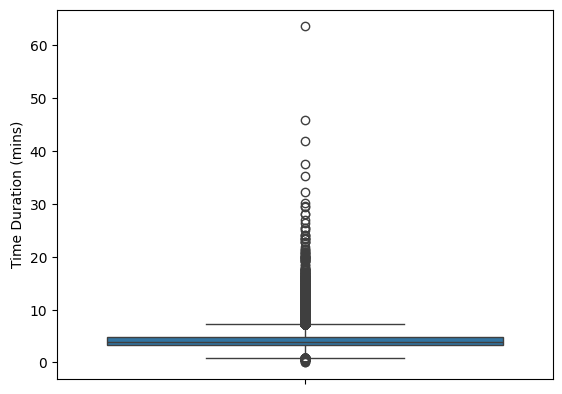

In [50]:
# time duration boxplot

sns.boxplot(time_duration_mins)
plt.ylabel("Time Duration (mins)")
plt.show()

In [51]:
# song that is longer than 60 mins

(
    df_songs
    .loc[time_duration_mins > 60]
)

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
25337,TRDAOJL128F932C383,Dopesmoker,Sleep,1vhvheW4R0KbK6Kr3NFplW,"psychedelic, doom_metal",NaN,2003,3816373,0.16,0.572,5,-6.949,1,0.0321,0.00367,0.745,0.0952,0.0932,96.926,4


### Continuous Columns

In [52]:
continuous_columns = df_songs.select_dtypes(include="float").columns
continuous_columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

**Danceability**
  
**What it means:** Measures how suitable a track is for dancing, based on tempo, rhythm stability, beat strength, and overall regularity.  
- **When value is small:** The song may feel less rhythmic or harder to dance to, like ballads or experimental music.  
- **When value is large:** The song is highly danceable, with a strong beat and rhythmic consistency, ideal for clubs or parties.  

---

**Energy**

**What it means:** Represents the intensity and activity of a song, considering factors like loudness, tempo, and instrumentation.  
- **When value is small:** The song feels mellow, calm, or laid-back, such as acoustic or chill tracks.  
- **When value is large:** The song feels loud, energetic, and lively, often found in rock or EDM genres.  

---

**Loudness**

**What it means:** The overall volume of the song in decibels (dB), averaged over the track.  
- **When value is small:** The song is quieter, suitable for soft or ambient styles.  
- **When value is large:** The song is louder and more powerful, typically associated with dynamic or energetic tracks.  

---

**Speechiness**

**What it means:** Measures the presence of spoken words in a track. A higher value indicates more speech-like content.  
- **When value is small:** The song is more musical, with fewer spoken or rap-like elements.  
- **When value is large:** The track has spoken word, podcast-style content, or heavy rap influence.  

---

**Acousticness**

**What it means:** Reflects how acoustic (non-electronic) the track is.  
- **When value is small:** The track is more electronic or synthetic in nature.  
- **When value is large:** The track is acoustic, featuring instruments like guitar, piano, or strings.  

---

**Instrumentalness**

**What it means:** Predicts the likelihood of a song having no vocals (purely instrumental).  
- **When value is small:** The track likely has vocals or lyrics.  
- **When value is large:** The track is primarily instrumental, like classical or ambient music.  

---

**Liveness**

**What it means:** Measures the presence of a live audience in the recording.  
- **When value is small:** The track sounds studio-produced without live ambiance.  
- **When value is large:** The track feels live, with audience sounds or a concert vibe.  

---

**Valence**

**What it means:** Indicates the positivity or happiness of a track's mood.  
- **When value is small:** The song feels sad, somber, or emotionally heavy.  
- **When value is large:** The song feels cheerful, uplifting, or happy.  

---

**Tempo**
  
**What it means:** The speed of the song in beats per minute (BPM).  
- **When value is small:** The song is slow-paced, such as ballads or downtempo tracks.  
- **When value is large:** The song is fast-paced, like dance or upbeat genres.  

In [53]:
def numerical_analysis(df,columns):
    for column in columns:
        print(f"Numerical Analysis for column {column}")
        print("Statistical Summary")
        print(df[column].describe())

        fig = plt.figure(figsize=(12,4))
        # hitogram for column
        plt.subplot(1,2,1)
        sns.histplot(df[column])
        plt.title(f"Histogram for {column}")
        # boxplot for column
        plt.subplot(1,2,2)
        sns.boxplot(df[column])
        plt.title(f"Boxplot for {column}")
        plt.show()

        print("#" * 120)
    print("*" * 120)
    print("Pairplot")
    sns.pairplot(df[columns])
    plt.show()

Numerical Analysis for column danceability
Statistical Summary
count    50674.000000
mean         0.493522
std          0.178833
min          0.000000
25%          0.364000
50%          0.497000
75%          0.621000
max          0.986000
Name: danceability, dtype: float64


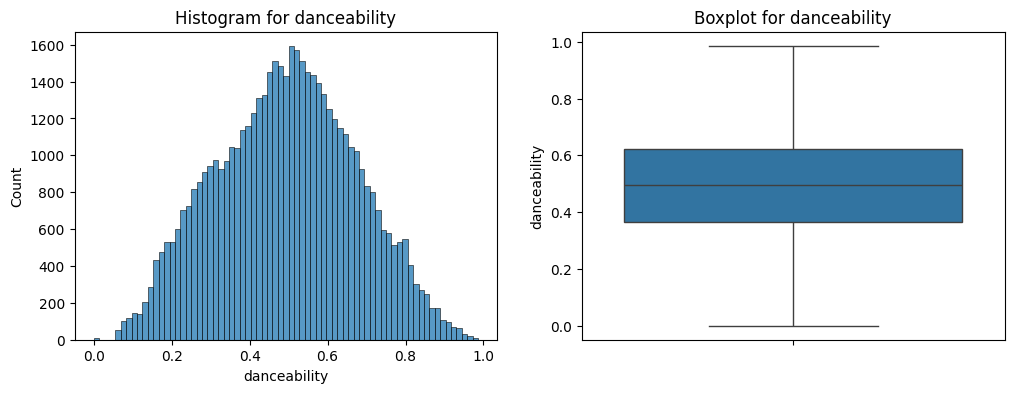

########################################################################################################################
Numerical Analysis for column energy
Statistical Summary
count    50674.000000
mean         0.686507
std          0.251803
min          0.000000
25%          0.514000
50%          0.744000
75%          0.905000
max          1.000000
Name: energy, dtype: float64


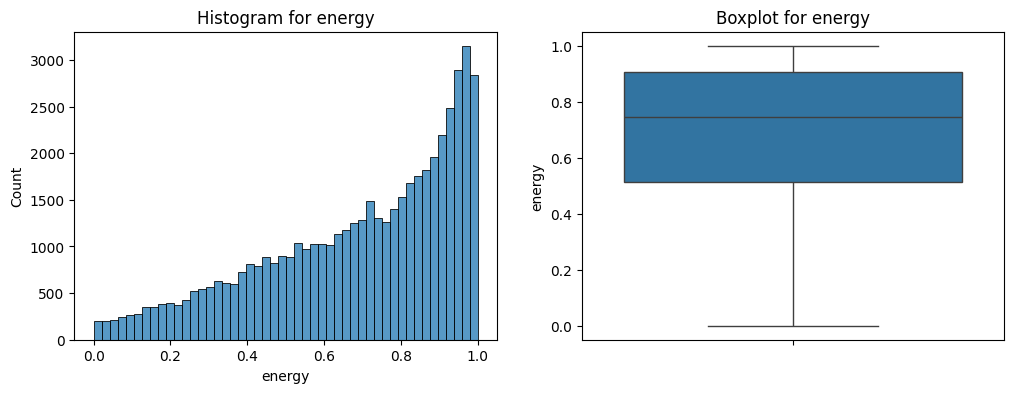

########################################################################################################################
Numerical Analysis for column loudness
Statistical Summary
count    50674.000000
mean        -8.291007
std          4.548359
min        -60.000000
25%        -10.375000
50%         -7.199500
75%         -5.089000
max          3.642000
Name: loudness, dtype: float64


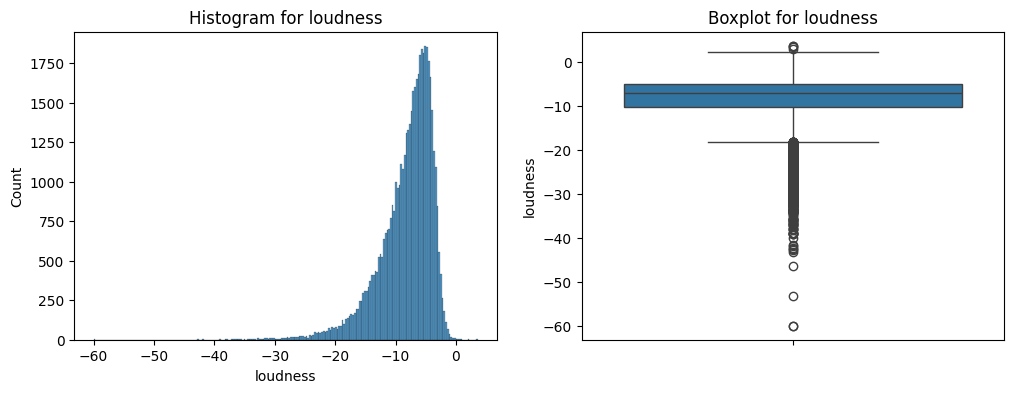

########################################################################################################################
Numerical Analysis for column speechiness
Statistical Summary
count    50674.000000
mean         0.076026
std          0.076012
min          0.000000
25%          0.035200
50%          0.048200
75%          0.083500
max          0.954000
Name: speechiness, dtype: float64


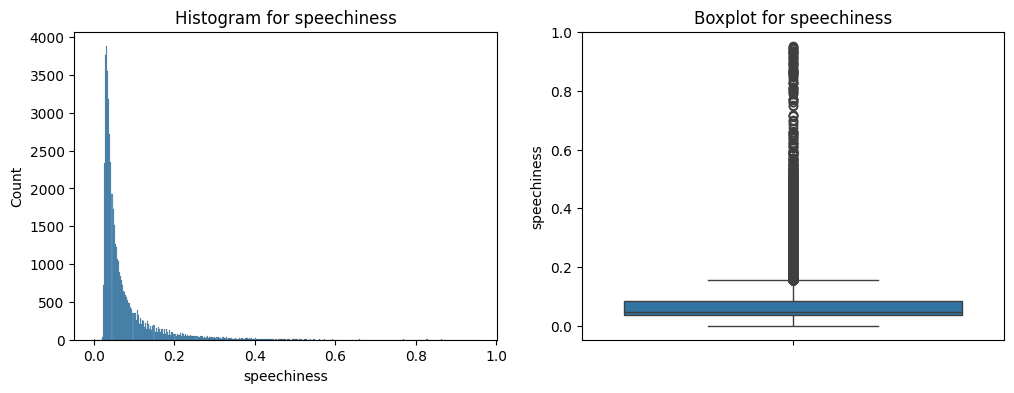

########################################################################################################################
Numerical Analysis for column acousticness
Statistical Summary
count    50674.000000
mean         0.213798
std          0.302839
min          0.000000
25%          0.001400
50%          0.039900
75%          0.340000
max          0.996000
Name: acousticness, dtype: float64


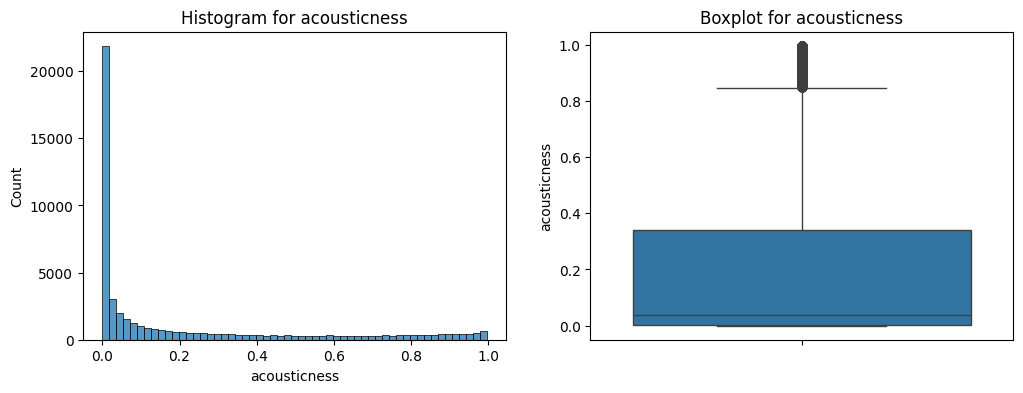

########################################################################################################################
Numerical Analysis for column instrumentalness
Statistical Summary
count    50674.000000
mean         0.225299
std          0.337067
min          0.000000
25%          0.000018
50%          0.005630
75%          0.441000
max          0.999000
Name: instrumentalness, dtype: float64


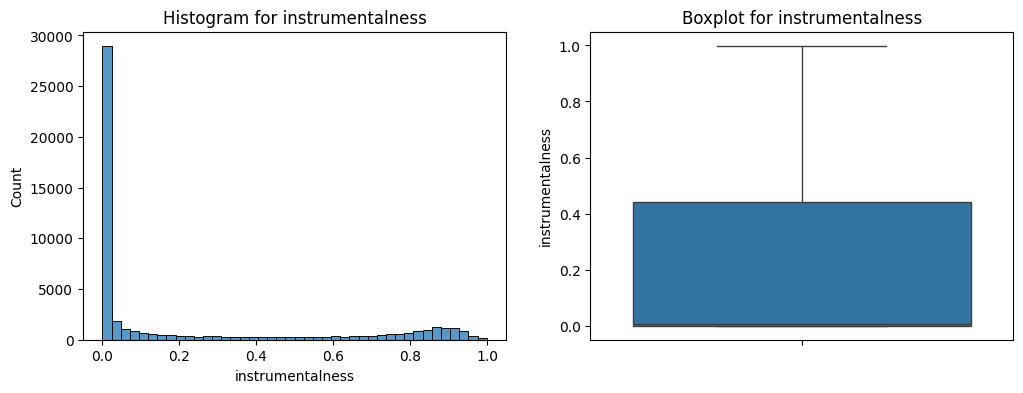

########################################################################################################################
Numerical Analysis for column liveness
Statistical Summary
count    50674.000000
mean         0.215439
std          0.184708
min          0.000000
25%          0.098400
50%          0.138000
75%          0.289000
max          0.999000
Name: liveness, dtype: float64


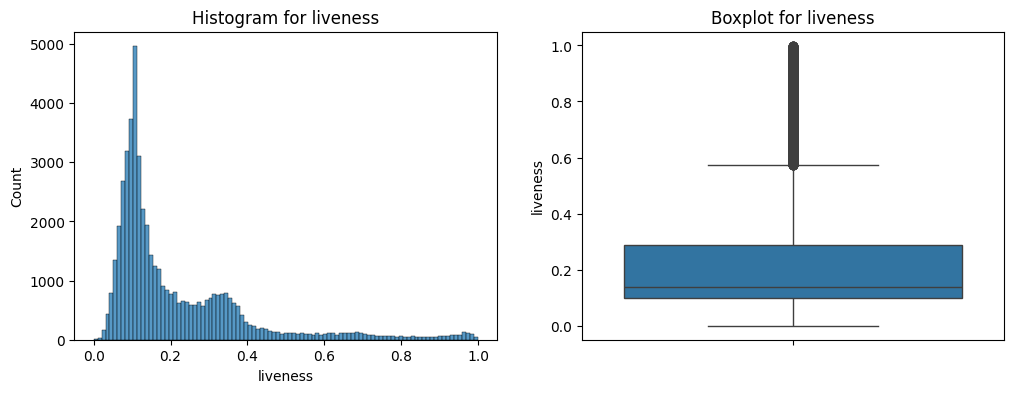

########################################################################################################################
Numerical Analysis for column valence
Statistical Summary
count    50674.000000
mean         0.433113
std          0.258767
min          0.000000
25%          0.214000
50%          0.405000
75%          0.634000
max          0.993000
Name: valence, dtype: float64


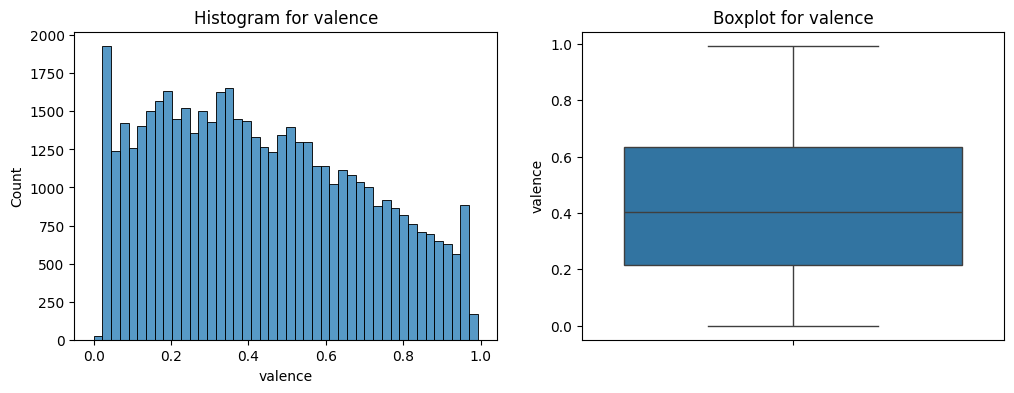

########################################################################################################################
Numerical Analysis for column tempo
Statistical Summary
count    50674.000000
mean       123.508794
std         29.622349
min          0.000000
25%        100.682500
50%        121.989000
75%        141.642250
max        238.895000
Name: tempo, dtype: float64


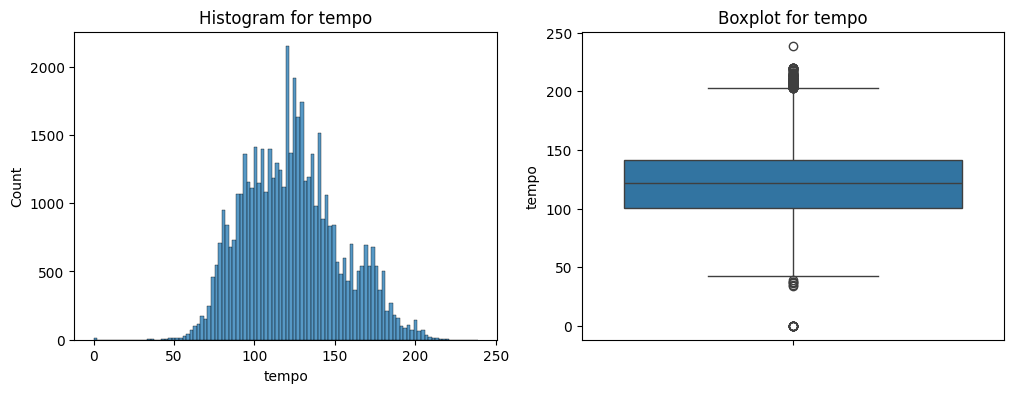

########################################################################################################################
************************************************************************************************************************
Pairplot


In [ ]:
numerical_analysis(df_songs,continuous_columns)

# Users & Song Data

In [ ]:
# load the dataset

df_users = pd.read_csv(users_data_path)

df_users.head()

In [ ]:
# dataset info

df_users.info()

In [ ]:
# check for duplicates

df_users.duplicated(subset=["track_id","user_id"]).sum()

**No duplicates in the data**

In [ ]:
# check for missing values

df_users.isna().sum()

In [ ]:
# unqiue users in the data

(
    df_users
    .loc[:,"user_id"]
    .nunique()
)

In [ ]:
# unique songs in the data

(
    df_users
    .loc[:,"track_id"]
    .nunique()
)

In [ ]:
# top 10 most played songs in user data

(
    df_users
    .loc[:,"track_id"]
    .value_counts()
    .head(10)
)


In [ ]:
top_10_songs = (
    df_users
    .loc[:,"track_id"]
    .value_counts()
    .head(10)
)

top_10_songs

In [ ]:
(
    df_songs
    .loc[df_songs["track_id"].isin(top_10_songs.index.tolist()),:]
)

In [ ]:
# most playcounts for songs

top_10_played_songs = (
    df_users.groupby("track_id")['playcount']
    .agg("sum")
    .sort_values(ascending=False)
    .head(10)
)

top_10_played_songs


In [ ]:
(
    df_songs
    .loc[df_songs["track_id"].isin(top_10_played_songs.index.tolist()),:]
)

In [ ]:
pd.concat([top_10_songs,top_10_played_songs],axis=1)

In [ ]:
# most diverse users
# top 10


most_diverse_users = (
                        df_users.groupby("user_id")['track_id']
                        .agg("count")
                        .sort_values(ascending=False)
                        .head(10)
                    )

most_diverse_users

In [ ]:
# most playcounts for users
# top 10

most_active_users = (
                        df_users.groupby("user_id")['playcount']
                        .agg("sum")
                        .sort_values(ascending=False)
                        .head(10)
                    )

most_active_users

In [ ]:
pd.concat([most_diverse_users,most_active_users],axis=1)